In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
#For median value 
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

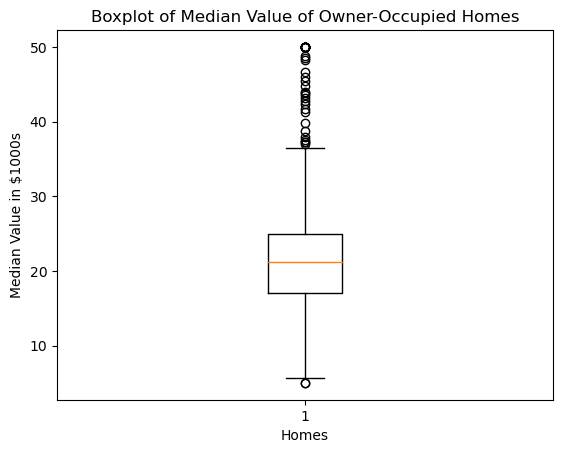

In [5]:
#Boxplot for visualization
fig, ax = plt.subplots()
ax.boxplot(boston_df["MEDV"])
ax.set_title('Boxplot of Median Value of Owner-Occupied Homes')
ax.set_xlabel('Homes')
ax.set_ylabel('Median Value in $1000s')
plt.show()

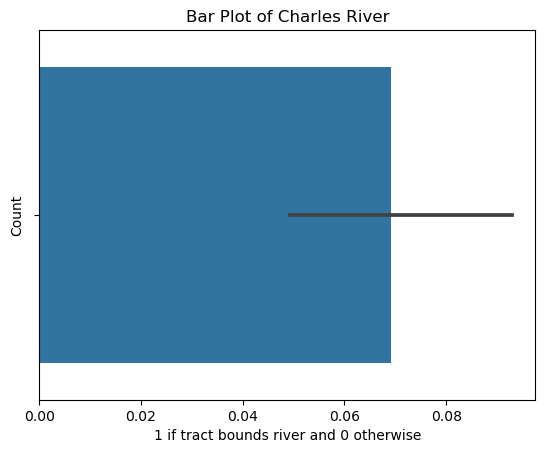

In [8]:
# Bar plot
sns.barplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River')
plt.xlabel('1 if tract bounds river and 0 otherwise')
plt.ylabel('Count')
plt.show()

In [13]:
#Provide a boxplot for the MEDV variable vs the AGE variable.
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_GROUPS'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
boston_df.head(10)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUPS
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


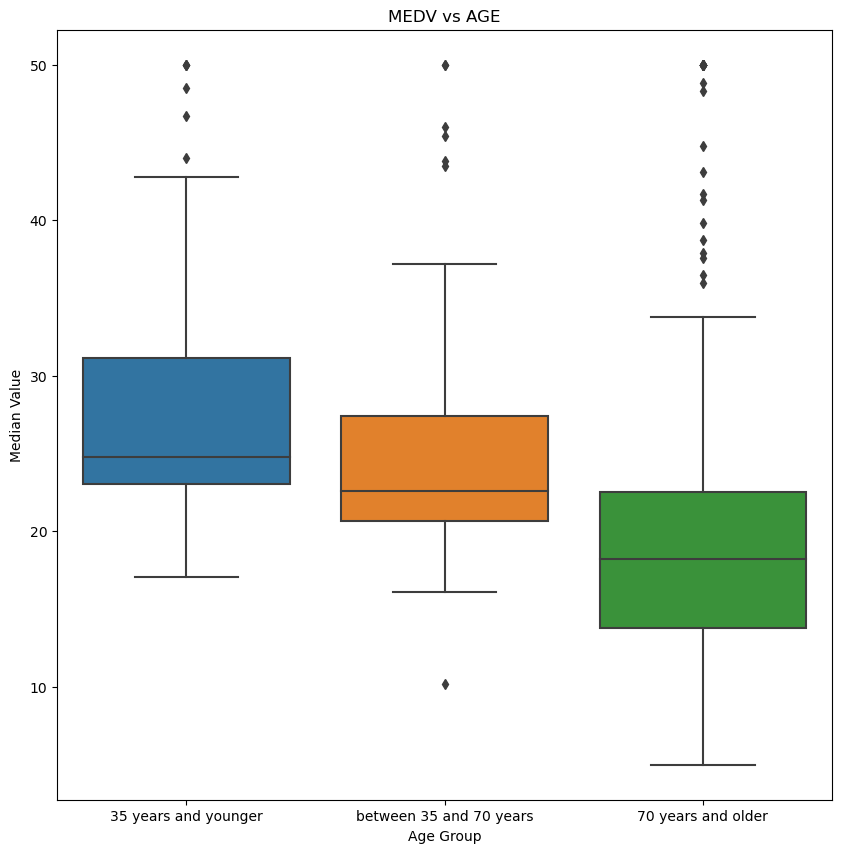

In [17]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='AGE_GROUPS', y='MEDV', data = boston_df)
plt.title('MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.show()

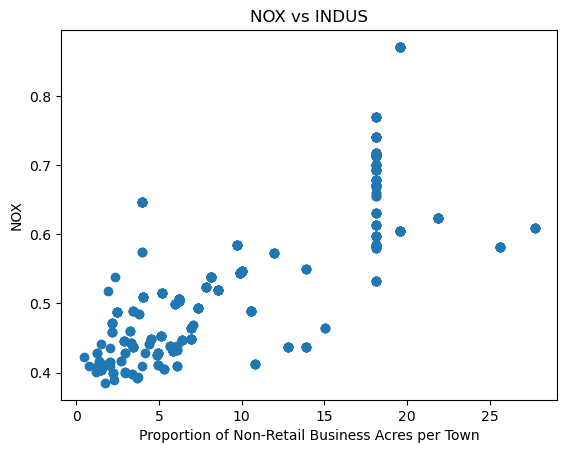

In [18]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('NOX')
plt.show()

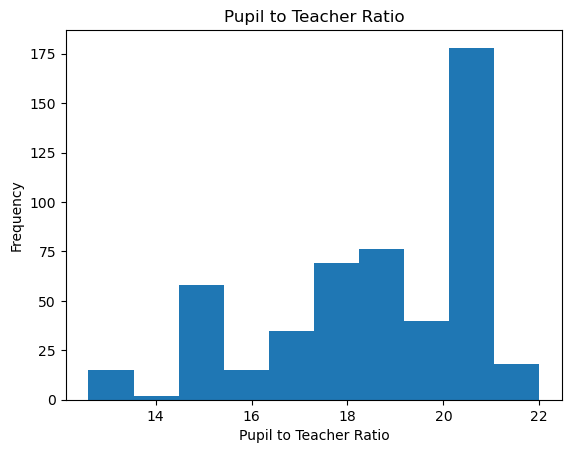

In [20]:
#Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df['PTRATIO'])
plt.title('Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Task 5
median_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
median_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(median_bound, median_not_bound)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("There is NO significant difference")
boston_df["AGE_GROUPS"].describe()

Reject Null Hypothesis


count                    506
unique                     3
top       70 years and older
freq                     287
Name: AGE_GROUPS, dtype: object

In [23]:
# list of median
age_categories = boston_df['AGE_GROUPS'].unique()
median_values = [boston_df[boston_df['AGE_GROUPS'] == age]['MEDV'] for age in age_categories]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*median_values)

# Comparing
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("There is no significant difference") 

Reject Null Hypothesis


In [25]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Pearson correlation coefficient
Pearson_coefficient = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

# Printing the correlation coefficient
print("Pearson correlation coefficient:", Pearson_coefficient)
if Pearson_coefficient == 0:
    print("Accept the Null Hypothesis")
else:
    print("Reject the Null Hypothesis")

Pearson correlation coefficient: 0.763651446920914
Reject the Null Hypothesis


In [29]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        12:11:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""